In [1]:
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ucars = pd .read_csv("usedcars.csv")
ucars

,year,model,price,mileage,color,transmission
0,2011,SEL,21992.0,7413.0,Yellow,AUTO
1,2011,SEL,20995.0,10926.0,Gray,AUTO
2,2011,SEL,19995.0,7351.0,Silver,AUTO
3,2011,SEL,17809.0,11613.0,Gray,AUTO
4,2012,SE,17500.0,8367.0,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200.0,95000.0,Silver,AUTO
146,2002,SE,5995.0,87003.0,Red,AUTO
147,2000,SE,5980.0,NaN,Red,AUTO
148,2001,SE,4899.0,151479.0,Yellow,AUTO


In [78]:
ucars.shape

(150, 6)

In [41]:
ucars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
year            150 non-null int64
model           150 non-null object
price           142 non-null float64
mileage         143 non-null float64
color           141 non-null object
transmission    142 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 7.2+ KB


In [42]:
ucars.isnull().sum()

year            0
model           0
price           8
mileage         7
color           9
transmission    8
dtype: int64

In [43]:
ucars.head(10)

,year,model,price,mileage,color,transmission
0,2011,SEL,21992.0,7413.0,Yellow,AUTO
1,2011,SEL,20995.0,10926.0,Gray,AUTO
2,2011,SEL,19995.0,7351.0,Silver,AUTO
3,2011,SEL,17809.0,11613.0,Gray,AUTO
4,2012,SE,17500.0,8367.0,White,AUTO
5,2010,SEL,17495.0,25125.0,Silver,NaN
6,2011,SEL,17000.0,NaN,Blue,AUTO
7,2010,SEL,16995.0,21026.0,Silver,AUTO
8,2011,SES,NaN,32655.0,Silver,AUTO
9,2010,SES,16995.0,36116.0,Silver,AUTO


In [44]:
ucars.tail(10)

,year,model,price,mileage,color,transmission
140,2004,SE,6999.0,105714.0,Silver,AUTO
141,2007,SE,6995.0,86862.0,White,AUTO
142,2000,SE,6980.0,60161.0,Green,AUTO
143,2004,SES,6980.0,101130.0,Gray,AUTO
144,2004,SES,6950.0,119720.0,NaN,AUTO
145,2006,SES,6200.0,95000.0,Silver,AUTO
146,2002,SE,5995.0,87003.0,Red,AUTO
147,2000,SE,5980.0,NaN,Red,AUTO
148,2001,SE,4899.0,151479.0,Yellow,AUTO
149,2000,SE,3800.0,109259.0,Red,AUTO


In [45]:
ucars['color'].value_counts()

Black     33
Silver    32
Red       22
Blue      16
Gray      15
White     14
Green      5
Yellow     3
Gold       1
Name: color, dtype: int64

In [46]:
ucars ['color'].fillna('Black', inplace=True)

In [47]:
ucars['transmission'].value_counts()

AUTO      124
MANUAL     18
Name: transmission, dtype: int64

In [48]:
ucars ['transmission'].fillna('AUTO', inplace=True)

In [49]:
ucars.isnull().sum()

year            0
model           0
price           8
mileage         7
color           0
transmission    0
dtype: int64

In [50]:
features = ucars.iloc[:,:-1].values
features

array([[2011, 'SEL', 21992.0, 7413.0, 'Yellow'],
       [2011, 'SEL', 20995.0, 10926.0, 'Gray'],
       [2011, 'SEL', 19995.0, 7351.0, 'Silver'],
       [2011, 'SEL', 17809.0, 11613.0, 'Gray'],
       [2012, 'SE', 17500.0, 8367.0, 'White'],
       [2010, 'SEL', 17495.0, 25125.0, 'Silver'],
       [2011, 'SEL', 17000.0, nan, 'Blue'],
       [2010, 'SEL', 16995.0, 21026.0, 'Silver'],
       [2011, 'SES', nan, 32655.0, 'Silver'],
       [2010, 'SES', 16995.0, 36116.0, 'Silver'],
       [2010, 'SES', 16995.0, 40539.0, 'Black'],
       [2011, 'SES', 16992.0, 9199.0, 'Silver'],
       [2011, 'SEL', 16950.0, 9388.0, 'Green'],
       [2010, 'SES', 16950.0, 32058.0, 'Red'],
       [2011, 'SE', 16000.0, 15367.0, 'White'],
       [2011, 'SES', 15999.0, 16368.0, 'Blue'],
       [2010, 'SEL', 15999.0, 19926.0, 'Silver'],
       [2010, 'SES', 15995.0, nan, 'Silver'],
       [2011, 'SEL', 15992.0, 11662.0, 'Blue'],
       [2011, 'SEL', 15992.0, 32069.0, 'Silver'],
       [2010, 'SES', 15988.0, 16035.

In [51]:
labels = ucars.iloc[:,-1].values

In [52]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)

#2 step transformation
#Fit and transform
imputer.fit(features[:,[2,3]])
features[:,[2,3]] = imputer.fit_transform(features[:,[2,3]])

C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [53]:
df1 = pd.DataFrame(features)
df1

,0,1,2,3,4
0,2011,SEL,21992,7413,Yellow
1,2011,SEL,20995,10926,Gray
2,2011,SEL,19995,7351,Silver
3,2011,SEL,17809,11613,Gray
4,2012,SE,17500,8367,White
...,...,...,...,...,...
145,2006,SES,6200,95000,Silver
146,2002,SE,5995,87003,Red
147,2000,SE,5980,43727,Red
148,2001,SE,4899,151479,Yellow


In [54]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [55]:
df1.rename(columns = {0:"year", 1:"model", 2:"price", 3:"mileage", 4:"color"}, inplace =  True)

In [56]:
df1

,year,model,price,mileage,color
0,2011,SEL,21992,7413,Yellow
1,2011,SEL,20995,10926,Gray
2,2011,SEL,19995,7351,Silver
3,2011,SEL,17809,11613,Gray
4,2012,SE,17500,8367,White
...,...,...,...,...,...
145,2006,SES,6200,95000,Silver
146,2002,SE,5995,87003,Red
147,2000,SE,5980,43727,Red
148,2001,SE,4899,151479,Yellow


In [57]:
df1['model'].value_counts()

SE     78
SES    49
SEL    23
Name: model, dtype: int64

In [58]:
df1['model'].replace(['SE','SES', 'SEL'],[0,1,2],inplace=True)

In [59]:
df1['color'].value_counts()

Black     42
Silver    32
Red       22
Blue      16
Gray      15
White     14
Green      5
Yellow     3
Gold       1
Name: color, dtype: int64

In [60]:
df1['color'].replace(['Black','Silver','Red','Blue','Gray','White','Green','Yellow','Gold'],[3,4,5,6,7,8,9,10,11],inplace=True)

In [61]:
x= df1.loc[:,['price', 'mileage']].values

In [62]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

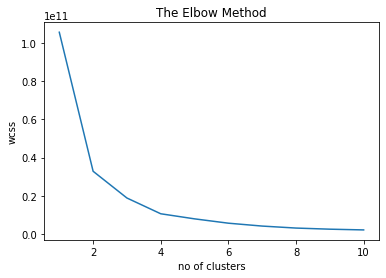

In [63]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [64]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

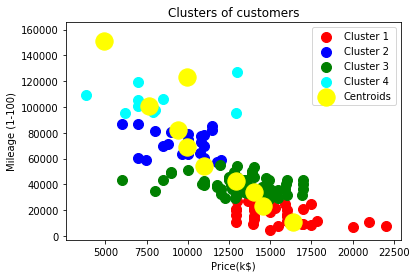

In [65]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price(k$)')
plt.ylabel('Mileage (1-100)')
plt.legend()
plt.show()

In [66]:
z = df1[['year','model','price','mileage','color']]
y= ucars[['transmission']]

In [67]:
z

,year,model,price,mileage,color
0,2011,2,21992,7413,10
1,2011,2,20995,10926,7
2,2011,2,19995,7351,4
3,2011,2,17809,11613,7
4,2012,0,17500,8367,8
...,...,...,...,...,...
145,2006,1,6200,95000,4
146,2002,0,5995,87003,5
147,2000,0,5980,43727,5
148,2001,0,4899,151479,10


In [68]:
y

,transmission
0,AUTO
1,AUTO
2,AUTO
3,AUTO
4,AUTO
...,...
145,AUTO
146,AUTO
147,AUTO
148,AUTO


In [69]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(z)

In [70]:
x_std

array([[ 1.03634013e+00,  1.86171410e+00,  2.95317109e+00,
        -1.37802975e+00,  2.47347469e+00],
       [ 1.03634013e+00,  1.86171410e+00,  2.62868447e+00,
        -1.24471988e+00,  9.63211991e-01],
       [ 1.03634013e+00,  1.86171410e+00,  2.30322147e+00,
        -1.38038250e+00, -5.47050713e-01],
       [ 1.03634013e+00,  1.86171410e+00,  1.59175934e+00,
        -1.21864988e+00,  9.63211991e-01],
       [ 1.49220822e+00, -8.62745557e-01,  1.49119127e+00,
        -1.34182775e+00,  1.46663289e+00],
       [ 5.80472038e-01,  1.86171410e+00,  1.48956396e+00,
        -7.05902083e-01, -5.47050713e-01],
       [ 1.03634013e+00,  1.86171410e+00,  1.32845977e+00,
         0.00000000e+00,  4.59791090e-01],
       [ 5.80472038e-01,  1.86171410e+00,  1.32683245e+00,
        -8.61449243e-01, -5.47050713e-01],
       [ 1.03634013e+00,  4.99484270e-01, -5.92013758e-16,
        -4.20156749e-01, -5.47050713e-01],
       [ 5.80472038e-01,  4.99484270e-01,  1.32683245e+00,
        -2.88820149e-01

In [71]:
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)
# [1.00671141 ] is a Eigen Value of x standardised data(finding covarince vale)

[[ 1.00671141  0.2040816   0.84632815 -0.71985433 -0.12698642]
 [ 0.2040816   1.00671141  0.37547539 -0.18098792 -0.07011167]
 [ 0.84632815  0.37547539  1.00671141 -0.76258156 -0.08327605]
 [-0.71985433 -0.18098792 -0.76258156  1.00671141  0.09256873]
 [-0.12698642 -0.07011167 -0.08327605  0.09256873  1.00671141]]


In [72]:
# Eigen vectors and eigen values from co-variance matrix
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('\nEigen Values \n%s' %eig_vals)


Eigen Values 
[2.69837724 0.13255328 0.29912303 0.91149118 0.99201231]


In [73]:
#This is a First Principal component Value
eig_vals[0]/sum(eig_vals)

0.5360776114515601

In [74]:
projected_x= x_std.dot(eig_vecs.T[0])
projected_x

array([-3.21845846e+00, -3.12579859e+00, -3.17510212e+00, -2.51227406e+00,
       -2.01805102e+00, -2.09456073e+00, -1.76944935e+00, -2.08286847e+00,
       -9.84868317e-01, -1.43009949e+00, -1.39637654e+00, -2.22334467e+00,
       -2.28489040e+00, -1.44801241e+00, -1.34239009e+00, -1.78183981e+00,
       -1.91750768e+00, -1.08882124e+00, -2.22448588e+00, -1.92456715e+00,
       -1.64434504e+00, -1.56663844e+00, -1.11557381e+00, -1.85159723e+00,
       -9.72752686e-01, -8.25219357e-01, -1.42409589e+00, -8.64037679e-01,
       -1.22828574e+00, -1.21167340e+00, -1.10578234e+00, -5.41087180e-01,
       -1.63987089e+00, -2.05539245e+00, -9.88329330e-01, -1.51917633e+00,
       -9.79154660e-01, -5.34501858e-01, -6.09548413e-01, -5.94244991e-01,
       -8.89921040e-01, -8.25169412e-01, -1.32996613e+00, -7.58753100e-01,
       -6.24349900e-01, -9.63981251e-01, -6.21985849e-01, -7.23367583e-01,
       -1.02027754e+00, -9.89247218e-01, -6.21850290e-01, -9.89368775e-01,
       -1.09129419e+00, -

In [75]:
result = pd.DataFrame(projected_x, columns= ['PC1'])
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,-3.218458,0.0,AUTO
1,-3.125799,0.0,AUTO
2,-3.175102,0.0,AUTO
3,-2.512274,0.0,AUTO
4,-2.018051,0.0,AUTO
...,...,...,...
145,2.796148,0.0,AUTO
146,4.088691,0.0,AUTO
147,3.726411,0.0,AUTO
148,6.120136,0.0,AUTO


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA Result')

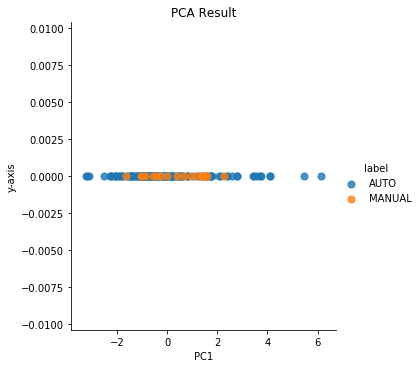

In [77]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg = False, scatter_kws={'s':50}, hue='label')
#title
plt.title('PCA Result')